# 1. Angajati

In [89]:
import pandas as pd
import numpy as np

In [90]:
url = 'https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab02/data/employees.csv'

In [91]:
df_employees = pd.read_csv(url)
print(df_employees)

    First Name  Gender  Start Date Last Login Time  Salary  Bonus %  \
0      Douglas    Male    8/6/1993        12:42 PM   97308    6.945   
1       Thomas    Male   3/31/1996         6:53 AM   61933    4.170   
2        Maria  Female   4/23/1993        11:17 AM  130590   11.858   
3        Jerry    Male    3/4/2005         1:00 PM  138705    9.340   
4        Larry    Male   1/24/1998         4:47 PM  101004    1.389   
..         ...     ...         ...             ...     ...      ...   
995      Henry     NaN  11/23/2014         6:09 AM  132483   16.655   
996    Phillip    Male   1/31/1984         6:30 AM   42392   19.675   
997    Russell    Male   5/20/2013        12:39 PM   96914    1.421   
998      Larry    Male   4/20/2013         4:45 PM   60500   11.985   
999     Albert    Male   5/15/2012         6:24 PM  129949   10.169   

    Senior Management                  Team  
0                True             Marketing  
1                True                   NaN  
2        

- numarul de angajati




In [92]:
nr_employees = len(df_employees)
print(f"Numarul de angajati: {nr_employees}")

Numarul de angajati: 1000


- numar si tipul informatiilor (proprietatilor) detinute pentru un angajat

In [93]:
print(f"Numarul informatiilor detinute pentru un angajat: {len(df_employees.columns)}")
print(f"Informatiile detinute despre un angajat: {df_employees.columns.values}")

Numarul informatiilor detinute pentru un angajat: 8
Informatiile detinute despre un angajat: ['First Name' 'Gender' 'Start Date' 'Last Login Time' 'Salary' 'Bonus %'
 'Senior Management' 'Team']


- numarul de angajati pentru care se detin date complete

In [94]:
employees = df_employees.dropna(axis=0, how='any')
print(f"Numarul de angajati cu date complete: {len(employees)}")

Numarul de angajati cu date complete: 764


- valorile minime, maxime, medii pentru fiecare proprietate

In [95]:
for series_name, series in df_employees.items():
  try:
    print(f"{series_name}: min => {min(series)}, max => {max(series)}, avg => {series.mean()}")
  except:
    pass

Salary: min => 35013, max => 149908, avg => 90662.181
Bonus %: min => 1.015, max => 19.944, avg => 10.207555000000001
Senior Management: min => False, max => True, avg => 0.5016077170418006


- in cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietate

In [96]:
for series_name, series in df_employees.items():
  print(f"{series_name}: {len(pd.unique(series))}")

First Name: 201
Gender: 3
Start Date: 972
Last Login Time: 720
Salary: 995
Bonus %: 971
Senior Management: 3
Team: 11


- daca sunt valori lipsa si cum se poate rezolva aceasta problema

In [97]:
new_df_employees = df_employees
for series_name, series in new_df_employees.items():
  new_df_employees[series_name].fillna("NaN", inplace=True)

print(f"(*Acum) Numarul de angajati cu date complete: {len(new_df_employees.dropna(axis=0, how='any'))}")


(*Acum) Numarul de angajati cu date complete: 1000


- vizualizare a distributiei salariilor angajatilor pe categorii de salariu.

/tmp/ipykernel_5659/3052497465.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


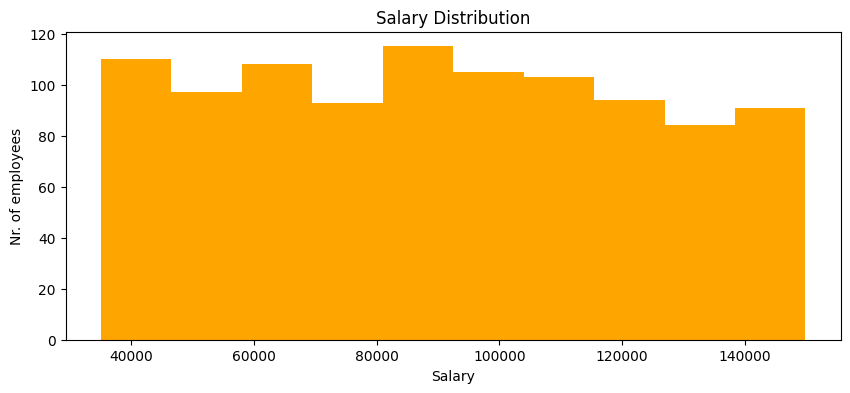

In [98]:
from matplotlib import pyplot as plt

salary_data = df_employees["Salary"]

fig = plt.figure(figsize=(10,4))

plt.hist(salary_data, color="orange")

plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Nr. of employees")

fig.show()

- distributia salariilor acestor angajati pe categorii de salar si echipa din care fac parte

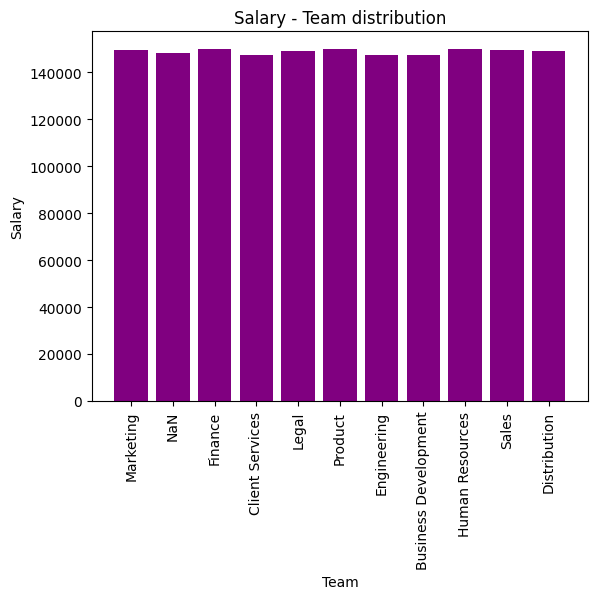

In [99]:
plt.bar(x=df_employees["Team"], height=df_employees["Salary"], color='purple')
plt.title("Salary - Team distribution")
plt.xlabel("Team")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

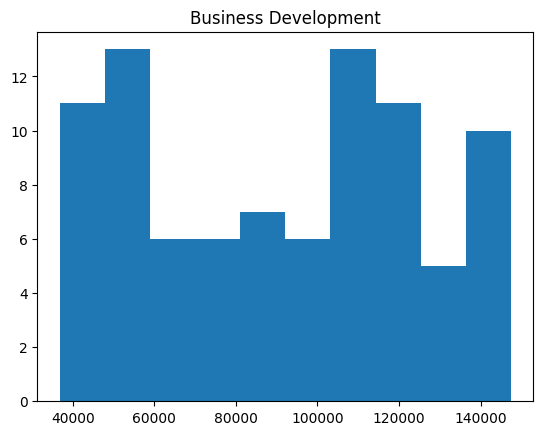

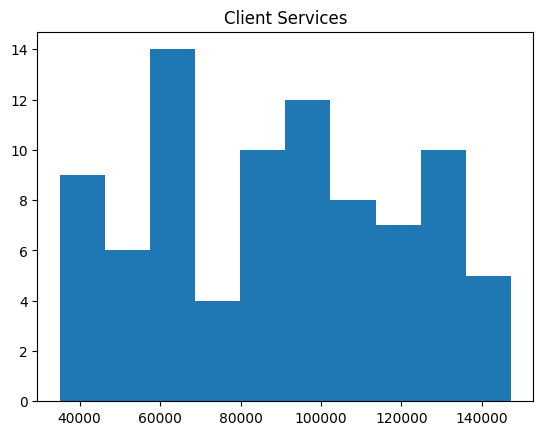

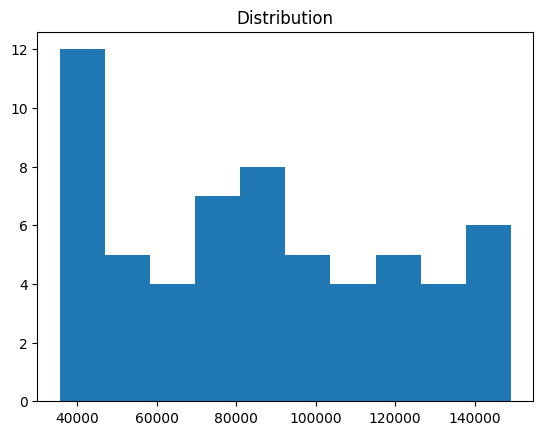

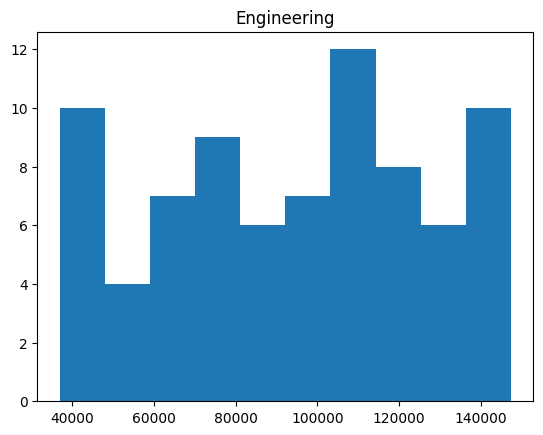

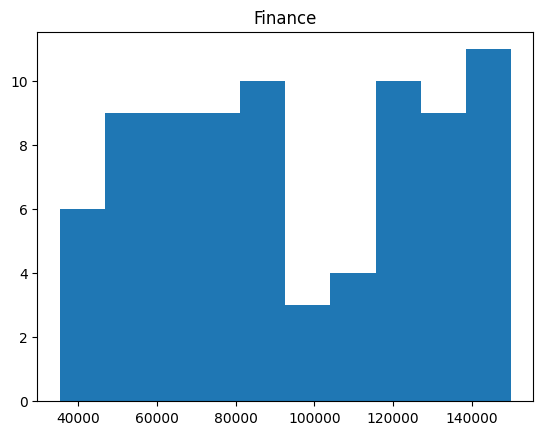

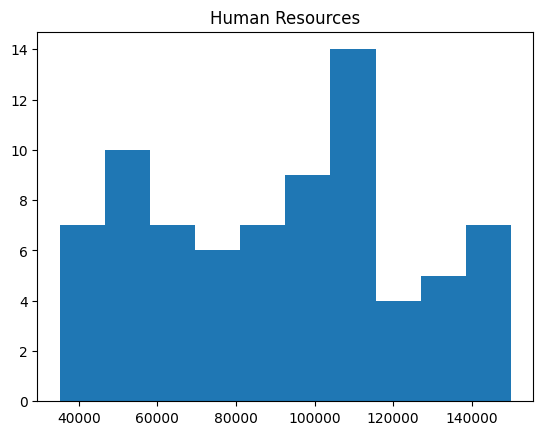

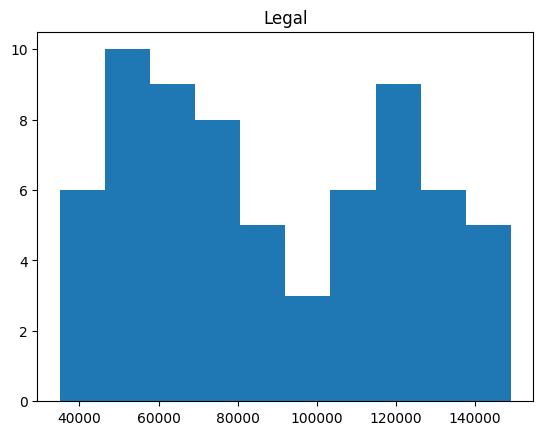

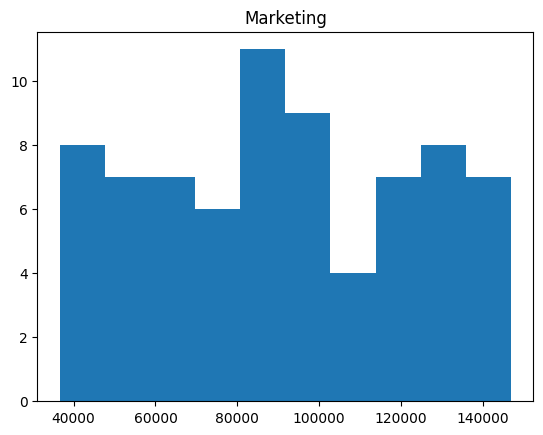

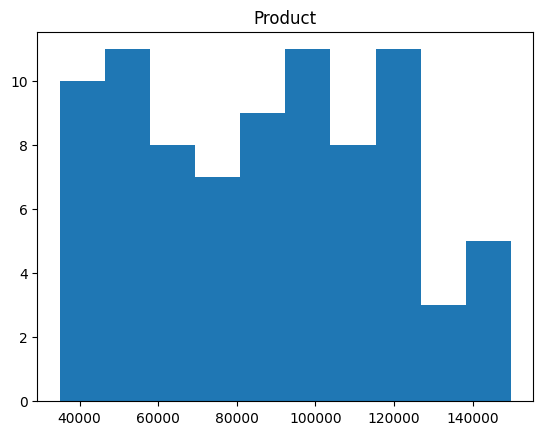

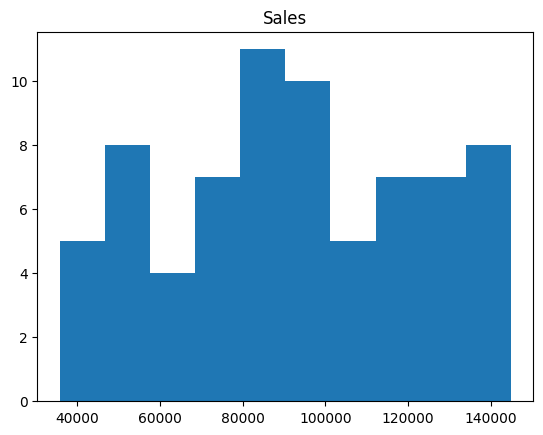

In [162]:
# print(df_employees["Salary"].groupby(df_employees["Team"]))
for title, group in employees.groupby("Team"):
    plt.hist(group['Salary'])
    plt.title(title)
    plt.show()

- angajati ce pot fi considerati "outlieri"



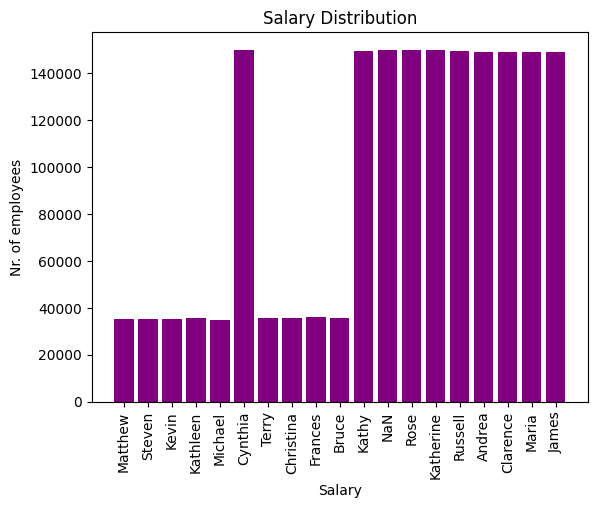

In [100]:
q01 = df_employees["Salary"].quantile(0.01)
q03 = df_employees["Salary"].quantile(0.99)

col1 = df_employees[df_employees["Salary"]<q01]
col2 = df_employees[df_employees["Salary"]>q03]

col = pd.concat([col1, col2])
# print(col)

plt.bar(x=col["First Name"], height=col["Salary"], color='purple')

plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Nr. of employees")
plt.xticks(rotation = 90)

plt.show()

# 2. Imagini

In [101]:
from PIL import Image
from IPython.display import display

- sa se vizualizeze una din imagini

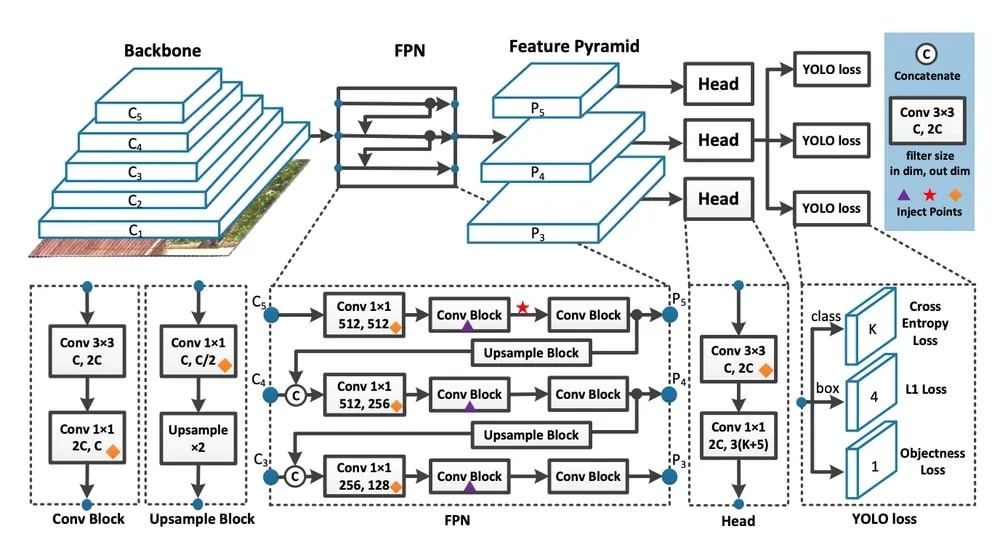

In [102]:
image = Image.open('images/YOLO.jpg')
display(image)

- daca imaginile nu aceeasi dimensiune, sa se redimensioneze toate la 128 x 128 pixeli si sa se vizualizeze imaginile intr-un cadru tabelar.

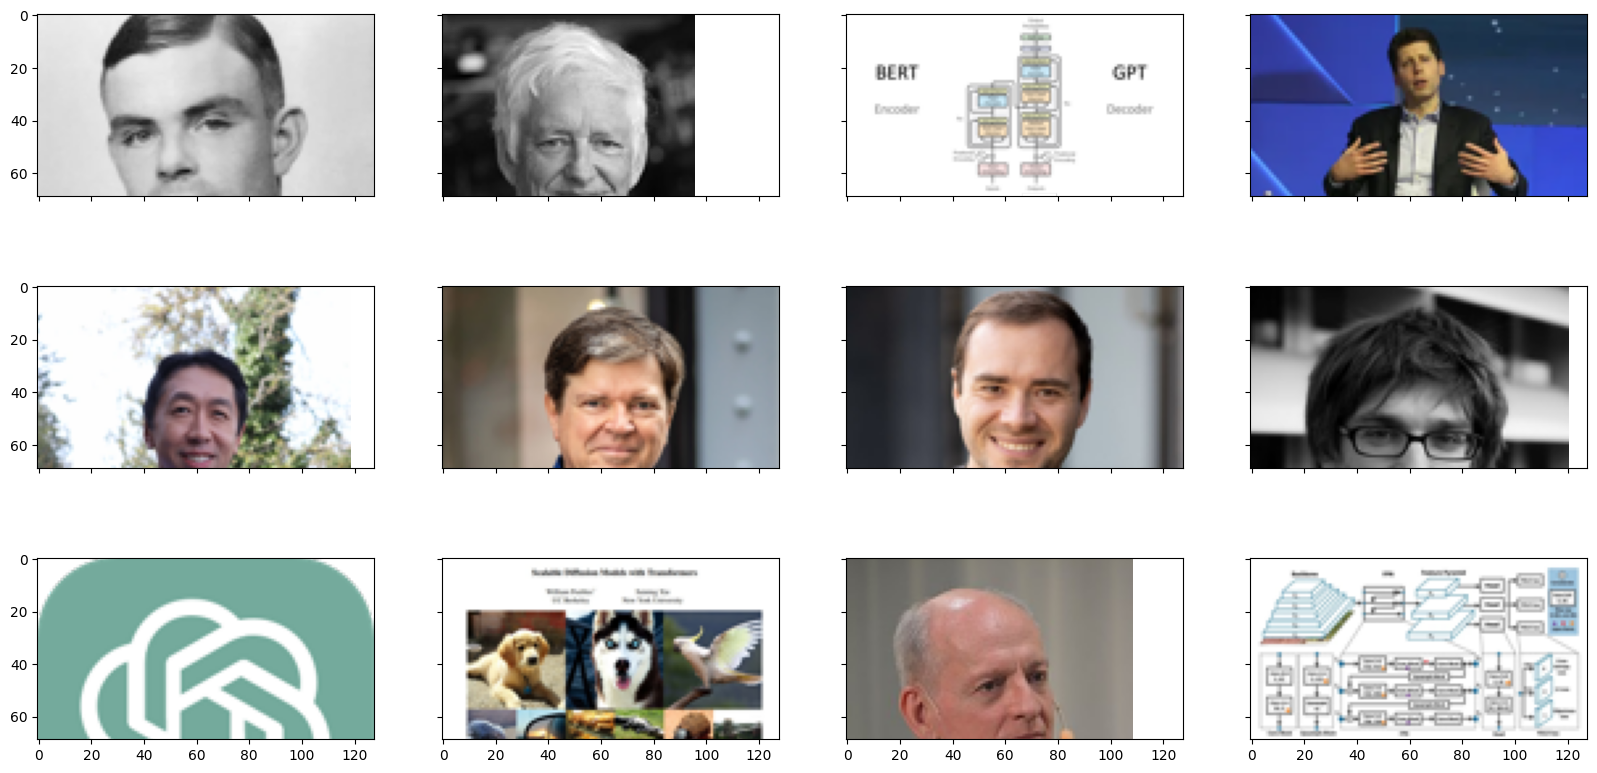

In [103]:
import glob

file_type = "*"
src_folder = "images/"

image_folder = glob.glob(src_folder + file_type)

fig, ax = plt.subplots(3, 4, figsize=(20, 10), sharex=True, sharey=True)

i = 0
j = 0

for image in image_folder:
    image = Image.open(image)
    image.thumbnail((128, 128))
    ax[j][i].imshow(image, cmap=plt.cm.gray)
    j+=1
    if j % 3 == 0: 
        i += 1
        j = 0


- sa se transforme imaginile in format gray-levels si sa se vizualizeze

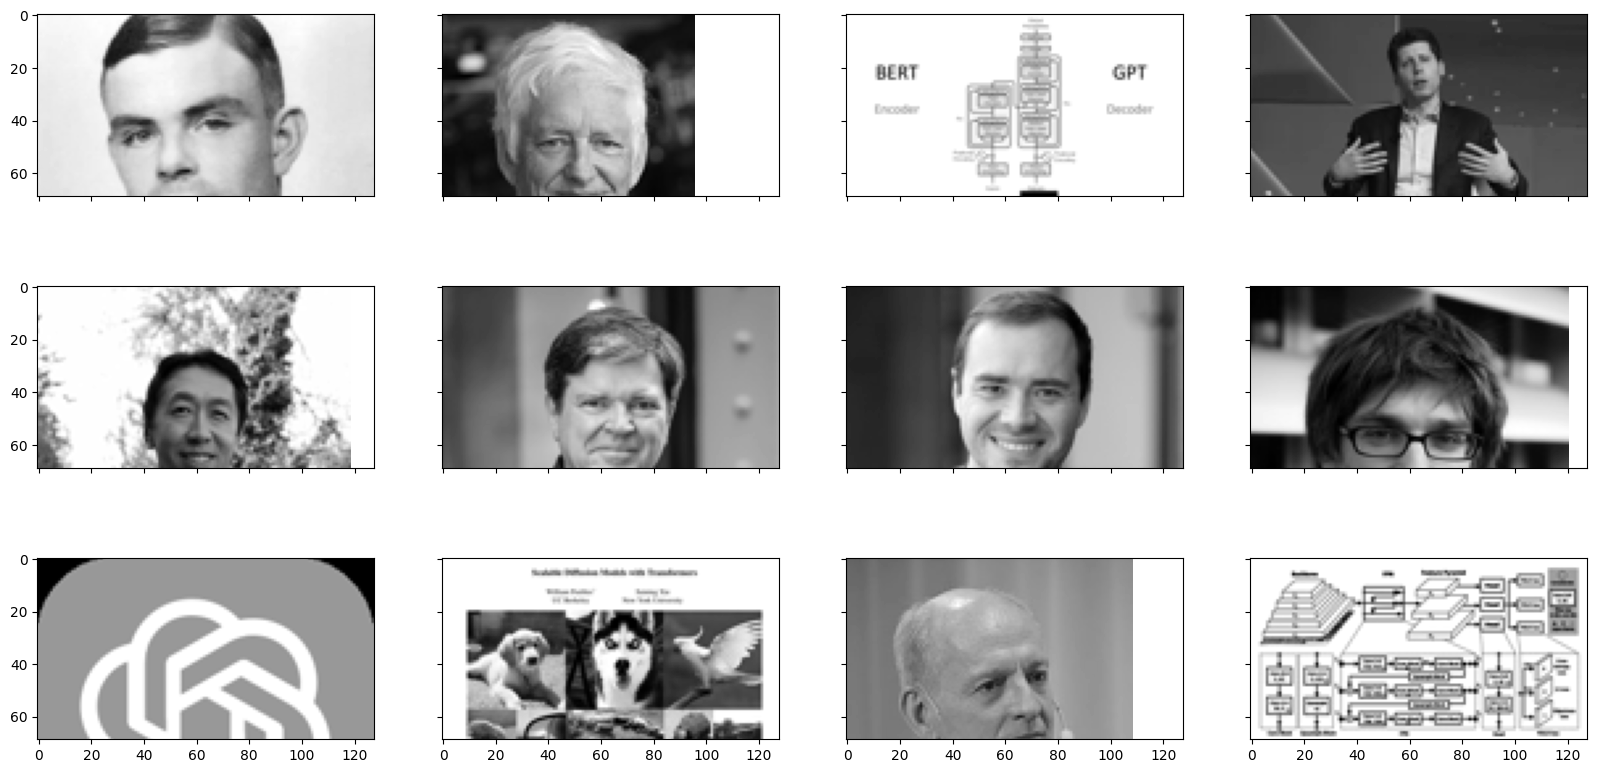

In [104]:
i = 0
j = 0

fig, ax = plt.subplots(3, 4, figsize=(20, 10), sharex=True, sharey=True)

for image in image_folder:
    image = Image.open(image).convert('L')
    image.thumbnail((128, 128))
    ax[j][i].imshow(image, cmap=plt.cm.gray)
    j+=1
    if j % 3 == 0: 
        i += 1
        j = 0
        


- sa se blureze o imagine si sa se afiseze in format "before-after"

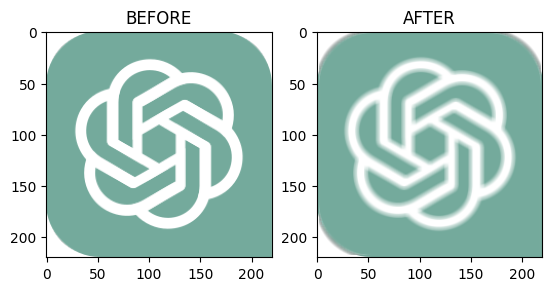

In [105]:
from PIL import ImageFilter

image_to_blur = Image.open("images/chatGPT.png")
blurred_image = image_to_blur.filter(ImageFilter.BLUR)

fix, ax = plt.subplots(1, 2)
ax[0].title.set_text("BEFORE")
ax[0].imshow(image_to_blur)
ax[1].title.set_text("AFTER")
ax[1].imshow(blurred_image)

- sa se identifice muchiile ontr-o imagine si sa se afiseze in format "before-after"

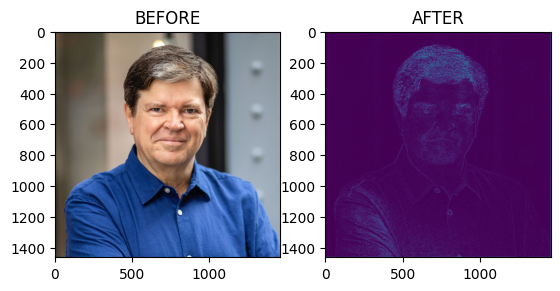

In [134]:
image = Image.open("images/LeCun.jpg")
image_find_edges = image.convert("L").filter(ImageFilter.FIND_EDGES)

fix, ax = plt.subplots(1, 2)
ax[0].title.set_text("BEFORE")
ax[0].imshow(image, cmap='gray')
ax[1].title.set_text("AFTER")
ax[1].imshow(image_find_edges)

# 3. Propozitii

In [107]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [108]:
import nltk

file1 = open("texts.txt", "r")
text = file1.read()
print(text)

nltk.download('punkt')

Mesaj de informare: 
Cursul și laboratoarele de Inteligență Artificială vor fi o 
provocare pentru toți. Suntem convinși că veți realiza proiecte 
foarte interesante. Vă încurajăm să adresați întrebări atunci 
când ceva nu e clar, atât în mod live, cât și folosind platforma 
Teams, canalul ”general”. 
Dacă ați citit până aici, vă rugăm să lăsați un mesaj pe canalul 
general cu textul ”Am citit textul pentru problema 3”. 
Mesaj de informare generat de ChatGPT:
Stimați cursanți,
Suntem încântați să vă avem în echipa noastră pentru Cursul și 
laboratoarele de Inteligență Artificială. Această experiență va 
fi o adevărată provocare, dar suntem convinși că veți realiza 
proiecte extrem de interesante.
Vă încurajăm să fiți activi și să adresați întrebări atunci când 
ceva nu este clar. Fie că este vorba de o discuție în timp real 
sau prin intermediul platformei Teams, canalul ”general”, suntem 
aici să vă sprijinim.
Succes și să înceapă aventura AI!
Cu considerație, Echipa de Inteligență Ar

[nltk_data] Downloading package punkt to /home/albert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

- numarul de propozitii din text;

In [147]:
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(text)
nr_sentences = len(sentences)

print(f"Numarul de propozitii: {nr_sentences}")

Numarul de propozitii: 10


- numarul de cuvinte din text

In [148]:
from nltk.tokenize import word_tokenize
import string

words = word_tokenize(text)

nr_words = len(words)

print(f"Numarul de cuvinte: {nr_words}")

Numarul de cuvinte: 182


- numarul de cuvinte diferite din text

In [149]:
unique_words = list(set(nltk.word_tokenize(text))-set([",", ".", ":", ";", "/", "!", "”"]))
print(f"Numarul cuvintelor diferite: {len(unique_words)}")

Numarul cuvintelor diferite: 94


- cel mai scurt si cel mai lung cuvant (cuvinte)

In [155]:
longest = max(unique_words, key = len)
shortest = min(unique_words, key = len)

longest_word = [word for word in unique_words if len(word) == len(longest)]
print(longest_word)

shortest_word = [word for word in unique_words if len(word) == len(shortest)]
print(shortest_word)


laboratoarele
3
['laboratoarele']
['3', 'o', 'e']


- textul fara diacritice

In [150]:
text_fara_diacritice = text.replace("Ă", "A").replace("ă", "a").replace("Â", "A").replace("â", "a").replace("Î", "I").replace("î", "i").replace("Ș", "S").replace("ș", "s").replace("Ț", "T").replace("ț", "t")

print(text_fara_diacritice)

Mesaj de informare: 
Cursul si laboratoarele de Inteligenta Artificiala vor fi o 
provocare pentru toti. Suntem convinsi ca veti realiza proiecte 
foarte interesante. Va incurajam sa adresati intrebari atunci 
cand ceva nu e clar, atat in mod live, cat si folosind platforma 
Teams, canalul ”general”. 
Daca ati citit pana aici, va rugam sa lasati un mesaj pe canalul 
general cu textul ”Am citit textul pentru problema 3”. 
Mesaj de informare generat de ChatGPT:
Stimati cursanti,
Suntem incantati sa va avem in echipa noastra pentru Cursul si 
laboratoarele de Inteligenta Artificiala. Aceasta experienta va 
fi o adevarata provocare, dar suntem convinsi ca veti realiza 
proiecte extrem de interesante.
Va incurajam sa fiti activi si sa adresati intrebari atunci cand 
ceva nu este clar. Fie ca este vorba de o discutie in timp real 
sau prin intermediul platformei Teams, canalul ”general”, suntem 
aici sa va sprijinim.
Succes si sa inceapa aventura AI!
Cu consideratie, Echipa de Inteligenta Ar

- sinonimul celui mai lung cuvant

# Normalizare

## pb1

- normalizare salariu


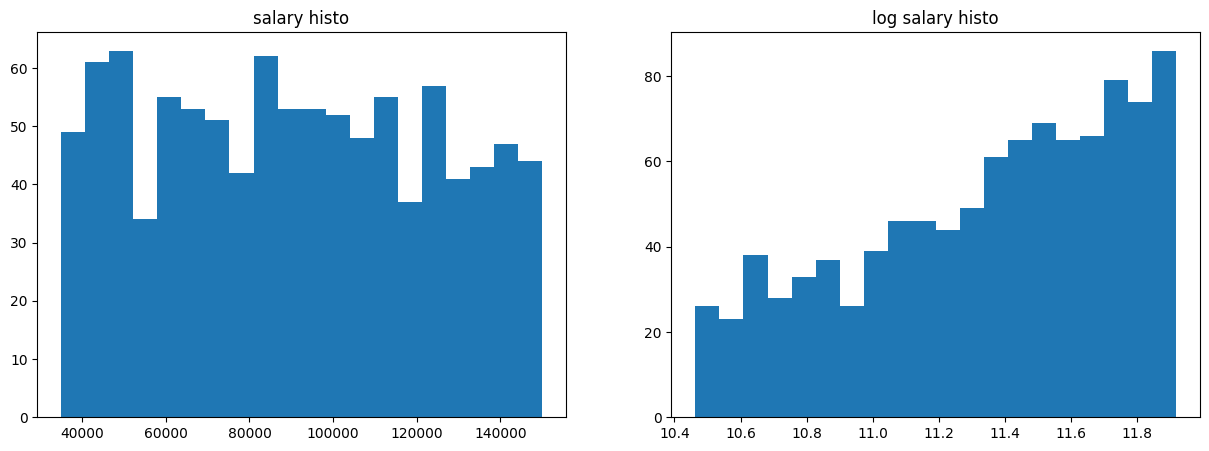

In [113]:
# log scaling
from math import log, sqrt

salaryData = df_employees["Salary"]
salaryLog = [log(p) for p in salaryData]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(salaryData, 20)
ax1.set_title('salary histo')
ax2.hist(salaryLog, 20)
ax2.set_title('log salary histo')
plt.show()

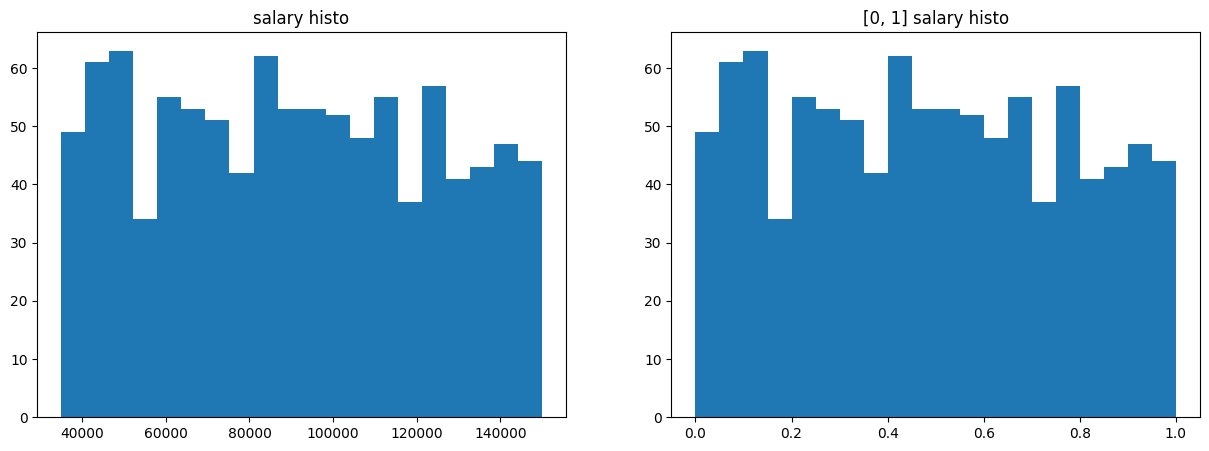

In [114]:
# min-max scaling
salaryScaled = [(s - min(salaryData)) / (max(salaryData) - min(salaryData)) for s in salaryData]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(salaryData, 20)
ax1.set_title('salary histo')
ax2.hist(salaryScaled, 20)
ax2.set_title('[0, 1] salary histo')
plt.show()

- normalizare bonus

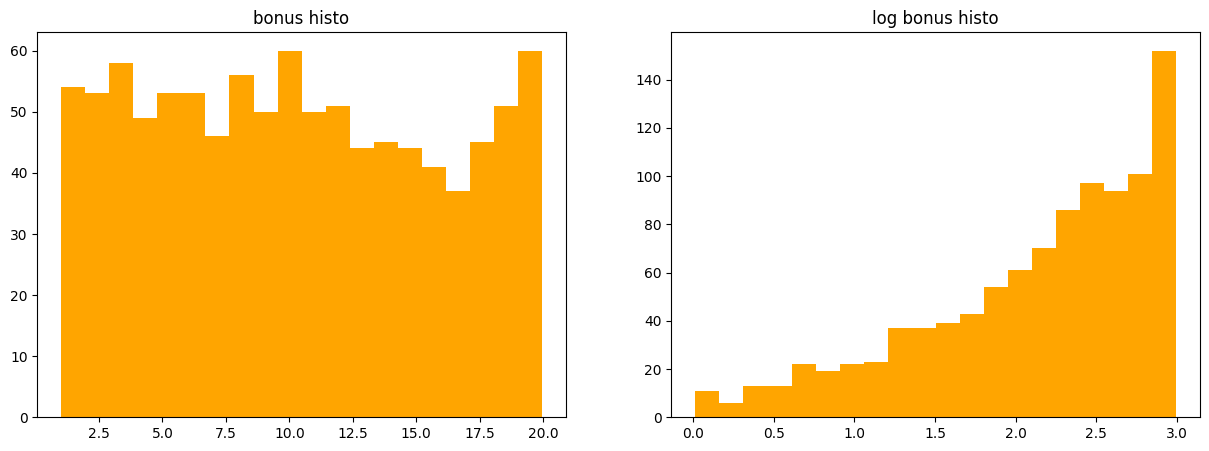

In [115]:
#log scaling
bonusData = df_employees["Bonus %"]
bonusLog = [log(b) for b in bonusData]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(bonusData, 20, color="orange")
ax1.set_title('bonus histo')
ax2.hist(bonusLog, 20, color="orange")
ax2.set_title('log bonus histo')
plt.show()

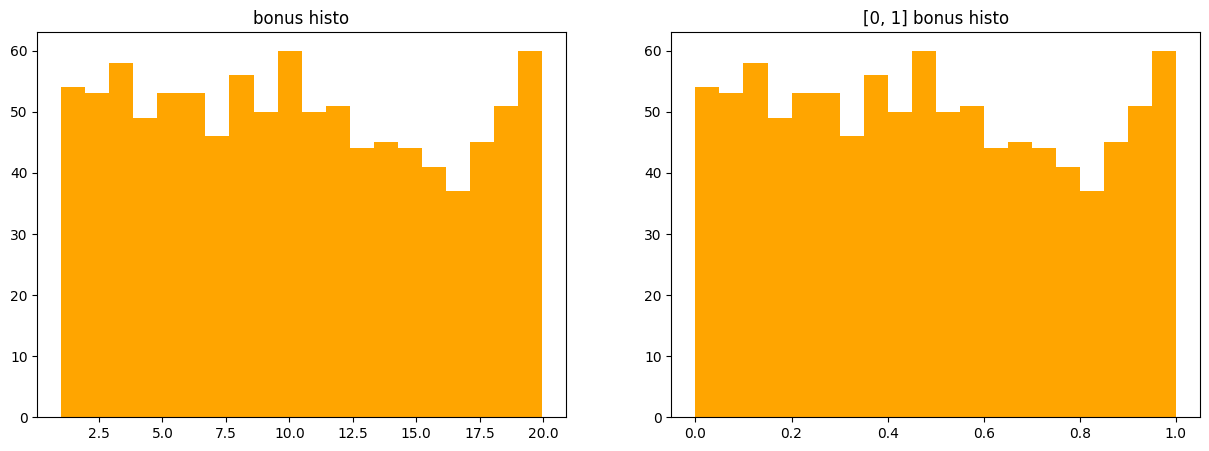

In [116]:
# min-max scaling
bonusScaling = [(b - min(bonusData)) / (max(bonusData) - min(bonusData)) for b in bonusData]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(bonusData, 20, color="orange")
ax1.set_title('bonus histo')
ax2.hist(bonusScaling, 20, color="orange")
ax2.set_title('[0, 1] bonus histo')
plt.show()

- normalizare echipa

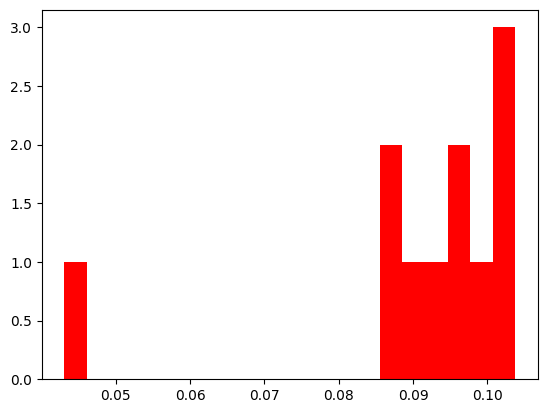

In [168]:
# df = pd.DataFrame(df_employees)
# normalizedSalaries = df.groupby("Team")["Salary"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# # new_df_employees = df_employees
# # new_df_employees['Normalized Salary'] = normalizedSalaries

# # print(new_df_employees)

# # fig, ax1 = plt.subplots()
# # ax1.hist(new_df_employees['Normalized Salary'], 20, color="red")

# # plt.show()

team_total_salary = df.groupby('Team')['Salary'].sum()
normalized_team_values = team_total_salary / team_total_salary.sum()

fig, ax1 = plt.subplots()
ax1.hist(normalized_team_values, 20, color="red")

plt.show()

## pb2

- normalizare in functie de valorile pixelilior

[[[0.94117647 0.94117647 0.94117647]
  [0.93333333 0.93333333 0.93333333]
  [0.91764706 0.91764706 0.91764706]
  ...
  [0.85882353 0.85882353 0.85882353]
  [0.85882353 0.85882353 0.85882353]
  [0.85882353 0.85882353 0.85882353]]

 [[0.94117647 0.94117647 0.94117647]
  [0.93333333 0.93333333 0.93333333]
  [0.91764706 0.91764706 0.91764706]
  ...
  [0.85882353 0.85882353 0.85882353]
  [0.85882353 0.85882353 0.85882353]
  [0.85882353 0.85882353 0.85882353]]

 [[0.94117647 0.94117647 0.94117647]
  [0.93333333 0.93333333 0.93333333]
  [0.91764706 0.91764706 0.91764706]
  ...
  [0.85882353 0.85882353 0.85882353]
  [0.85882353 0.85882353 0.85882353]
  [0.85882353 0.85882353 0.85882353]]

 ...

 [[0.85098039 0.85098039 0.85098039]
  [0.84313725 0.84313725 0.84313725]
  [0.83921569 0.83921569 0.83921569]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 [[0.85098039 0.85098039 0.85098039]
  [0.84313725 0.84313725 0.84313725]


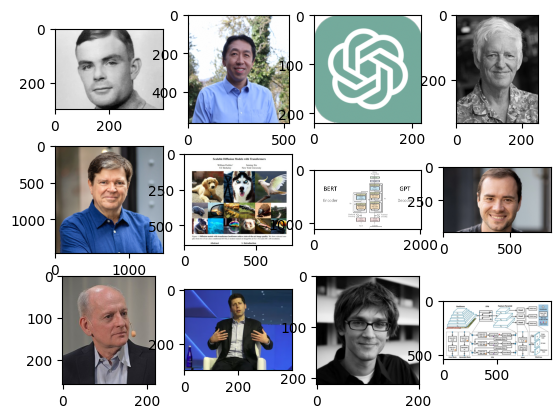

In [169]:
def normalizare(image):
    image_array = np.array(image)
    normalized_image = image_array / 255.0
    return normalized_image

normalizate = []
for img in image_folder:
    image = Image.open(img)
    normalizate.append(normalizare(image))

fig = plt.figure()
rows=3
columns=4
i=0
for image in normalizate:
    i+=1
    fig.add_subplot(rows,columns,i)
    plt.imshow(image, cmap="gray")
    print(image)

182.04695833333332
175.3061386768448
185.93199896694216
100.25895495495496
111.43577880002118
160.2389817057745
245.1197120525394
109.41640848670757
107.51513389711064
88.10338055555556
87.24838250064232
226.2968302238806
[182.04695833333332, 175.3061386768448, 185.93199896694216, 100.25895495495496, 111.43577880002118, 160.2389817057745, 245.1197120525394, 109.41640848670757, 107.51513389711064, 88.10338055555556, 87.24838250064232, 226.2968302238806]


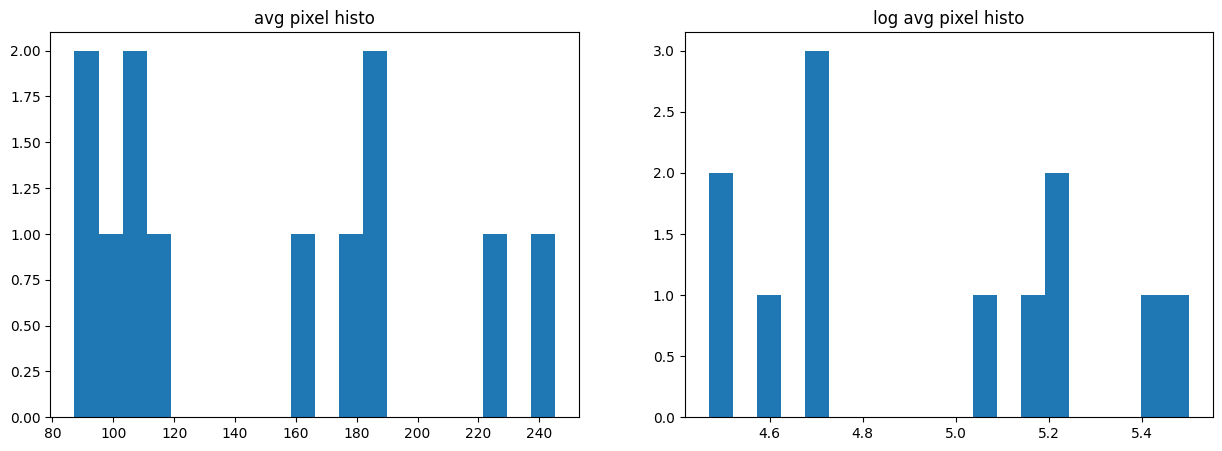

In [119]:
mean_images = []

for image in image_folder:
    image = Image.open(image)
    # display(image)
    image_array = np.array(image)
    # print(image_array)
    mean = image_array.mean()
    print(mean)
    mean_images.append(mean)

print(mean_images)

mean_imagesLog = [log(i) for i in mean_images]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(mean_images, 20)
ax1.set_title('avg pixel histo')
ax2.hist(mean_imagesLog, 20)
ax2.set_title('log avg pixel histo')
plt.show()

## pb3

- numarul de aparitii a cuvintelor la nivelul unei propozitii

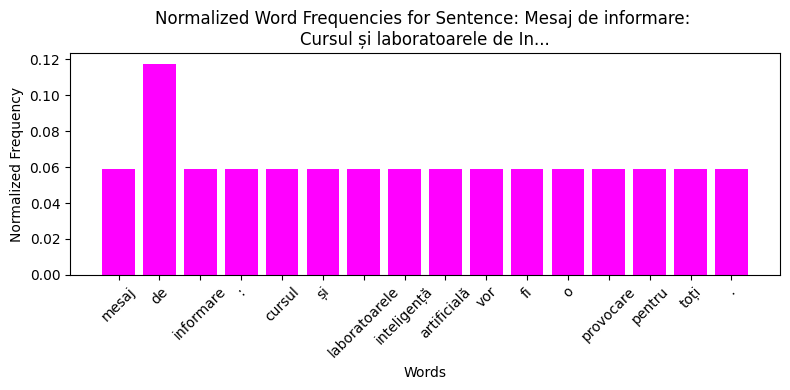

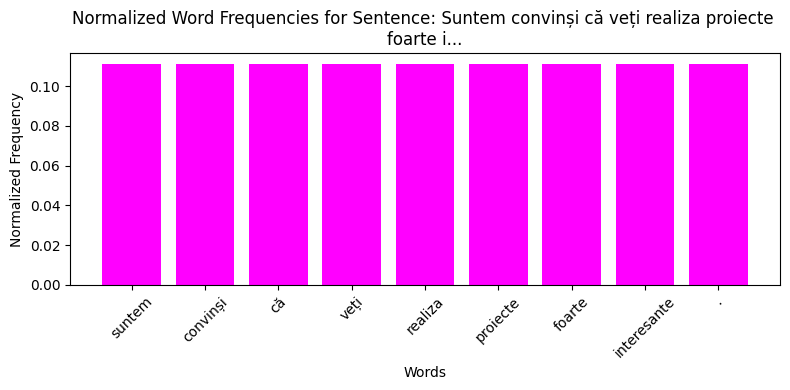

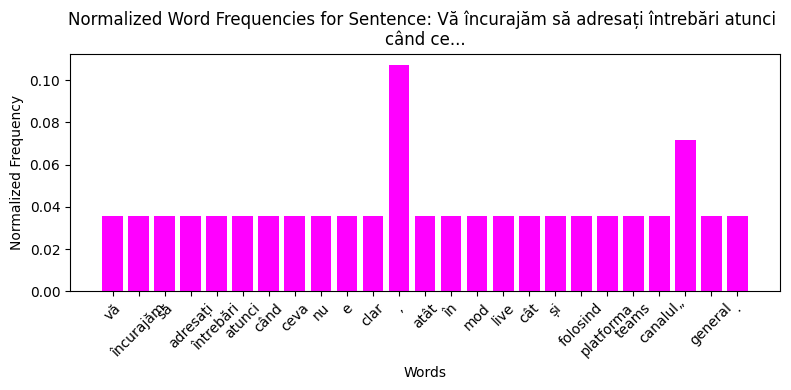

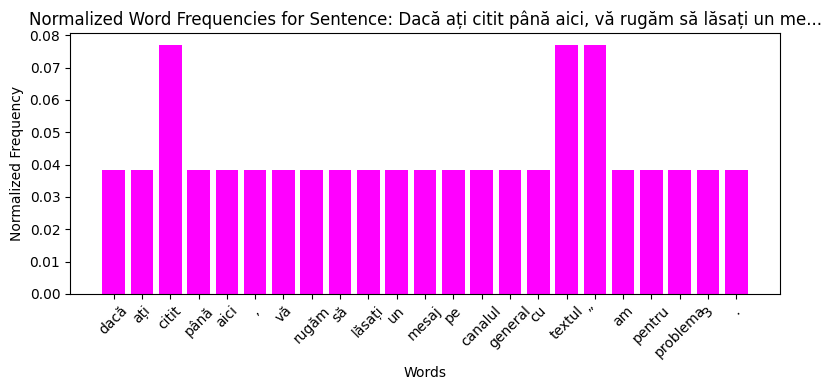

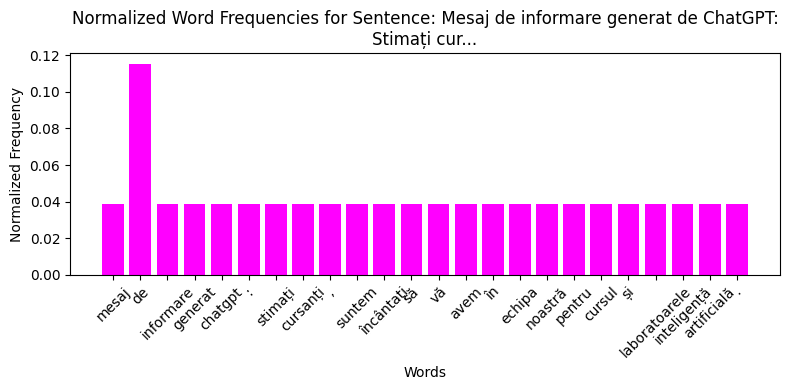

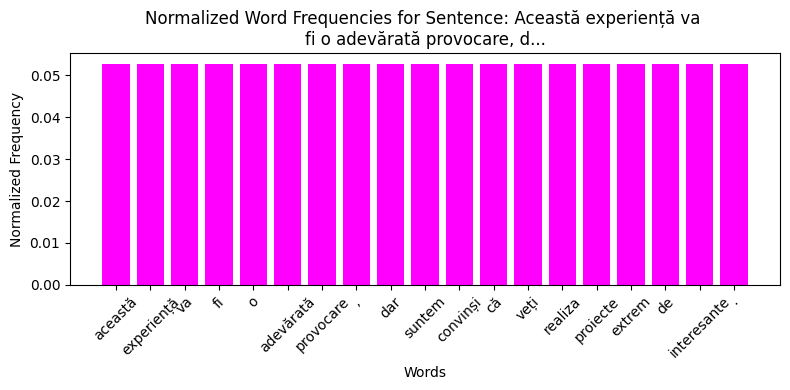

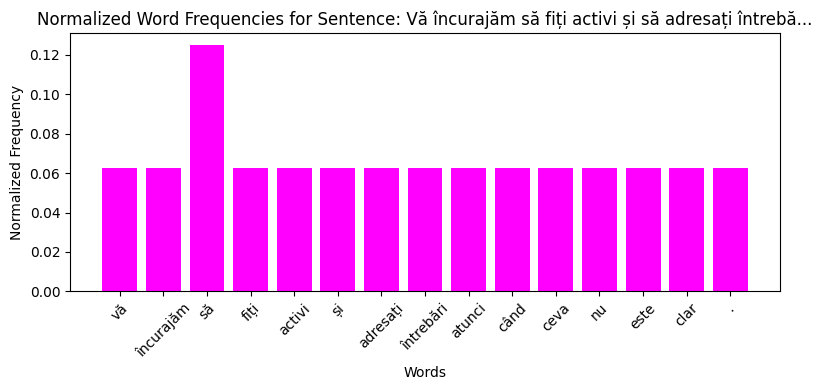

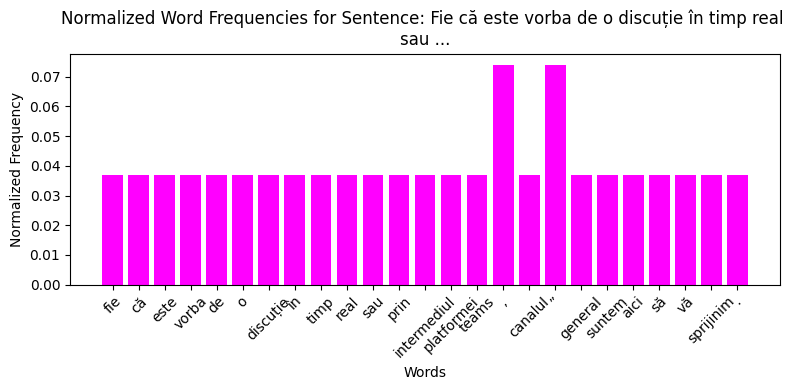

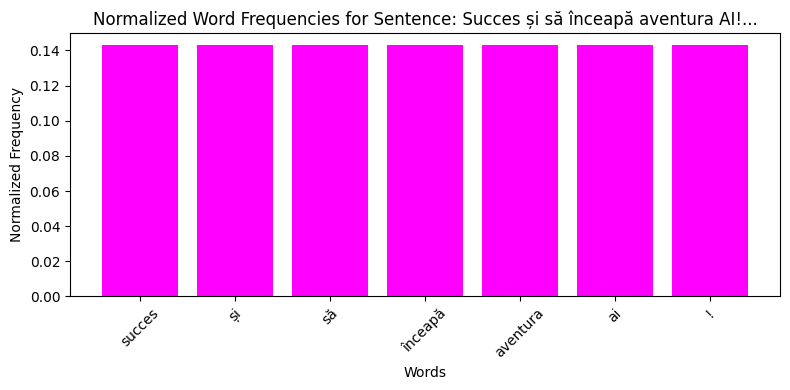

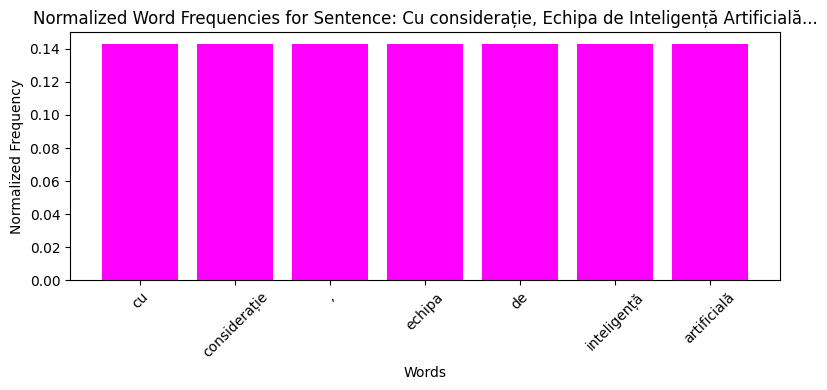

In [133]:
from nltk.probability import FreqDist

sentences = sent_tokenize(text)

sentence_normalized_frequencies = {}

for sentence in sentences:
    words = word_tokenize(sentence.lower())
    freq_dist = FreqDist(words)
    total_words = sum(freq_dist.values())
    normalized_freq_dist = {word: freq / total_words for word, freq in freq_dist.items()}
    sentence_normalized_frequencies[sentence] = normalized_freq_dist

# for sentence, normalized_freq_dist in sentence_normalized_frequencies.items():
#     for word, freq in normalized_freq_dist.items():
#         print(f"{word}: {freq}")

for sentence, normalized_freq_dist in sentence_normalized_frequencies.items():
    words = list(normalized_freq_dist.keys())
    frequencies = list(normalized_freq_dist.values())

    plt.figure(figsize=(8, 4))
    plt.bar(words, frequencies, color='magenta')
    plt.xlabel('Words')
    plt.ylabel('Normalized Frequency')
    plt.title('Normalized Word Frequencies for Sentence: ' + sentence[:50] + '...')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()     